In [ ]:
#%%

### ch00: python金融数据分析--导引（示例）
### Blue 2025-11-11
#####################################

In [ ]:
#%%

### 0.1 先举个栗子
###################

# 我们来分析一个简单的时间序列数据，例如某支股票(如美股阿里巴巴)价格。

# 导入所需的库
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [ ]:
#%%

# 在线获取股票数据（从雅虎财经）

## 这部分内容会在ch03章详细学习，如果需要获取最新数据请取消注释执行即可
data = yf.download("BABA", period="10d")   #下载最近30天的数据, period="max" 下载全部数据
data.columns = ['Close','High','Low','Open','Volume'] 
print(data.head(10))
# 将数据存入本地excel文件
outputfile = './data/stockdata_BABA_10d.csv'
data.to_csv(outputfile, header=False)

<ipython-input-3-e396a0fa15b8>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("BABA", period="10d")   #下载最近30天的数据, period="max" 下载全部数据
[*********************100%***********************]  1 of 1 completed

                 Close        High         Low        Open    Volume
Date                                                                
2025-11-14  153.800003  162.619995  151.779999  156.940002  33991000
2025-11-17  157.710007  161.024994  156.899994  157.979996  16911400
2025-11-18  159.720001  161.279999  156.699997  157.309998  12438900
2025-11-19  158.889999  160.970001  158.041000  159.324997   7949900
2025-11-20  153.279999  161.389999  153.000000  159.000000  13466900
2025-11-21  152.929993  155.880005  148.639999  151.979996  16240800
2025-11-24  160.729996  161.500000  158.699997  160.000000  21796600
2025-11-25  157.009995  166.369995  156.149994  165.199997  27097500
2025-11-26  157.600006  161.460007  150.000000  159.095001  21453100
2025-11-28  157.300003  158.690002  155.679993  156.160004   7185500


In [ ]:
#%%

# 获取股票数据（读取已保存的CSV文件）

# 假设我们有一个包含日期和股票价格的CSV文件，我们可以使用Pandas库来读取和处理数据。
df = pd.read_csv("./data/stockdata_BABA.csv", encoding = "gbk") #从csv读取数据
# 设置列名（如果使用header=False保存的数据需要手动设置列名，如果使用header=True保存的数据则不需要） 
# df.columns = ['Date','Close','High','Low','Open','Volume']
# 将日期列转换为日期时间类型，并设置为索引(如果不处理成日期型，后续使用mpl绘图时会报错)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# 显示数据前5行
print(df.head())

                Close       High        Low       Open     Volume
Date                                                             
2014-09-19  89.166862  94.684588  85.425062  88.036723  271879400
2014-09-22  85.368088  88.274152  84.997707  88.036729   66657800
2014-09-23  82.784912  85.928408  82.262584  84.465876   39009800
2014-09-24  86.013870  86.013870  82.832394  84.019512   32088000
2014-09-25  84.446884  86.897099  84.048014  86.507721   28598000


In [ ]:
#%%

# # 可以显示更多数据框的相关信息

print(df.head())         # 显示前5行
print(df.tail())         # 显示后5行
print(df.describe())     # 显示统计摘要
print(df.columns)        # 显示列名
print(df.index)          # 显示索引
print(df['Close'].dtype) # 显示Close列的数据类型

                Close       High        Low       Open     Volume
Date                                                             
2014-09-19  89.166862  94.684588  85.425062  88.036723  271879400
2014-09-22  85.368088  88.274152  84.997707  88.036729   66657800
2014-09-23  82.784912  85.928408  82.262584  84.465876   39009800
2014-09-24  86.013870  86.013870  82.832394  84.019512   32088000
2014-09-25  84.446884  86.897099  84.048014  86.507721   28598000
                 Close        High         Low        Open    Volume
Date                                                                
2025-11-21  152.929993  155.880005  148.639999  151.979996  16240800
2025-11-24  160.729996  161.500000  158.699997  160.000000  21796600
2025-11-25  157.009995  166.369995  156.149994  165.199997  27097500
2025-11-26  157.600006  161.460007  150.000000  159.095001  21453100
2025-11-28  157.300003  158.690002  155.679993  156.160004   7185500
             Close         High          Low         Op

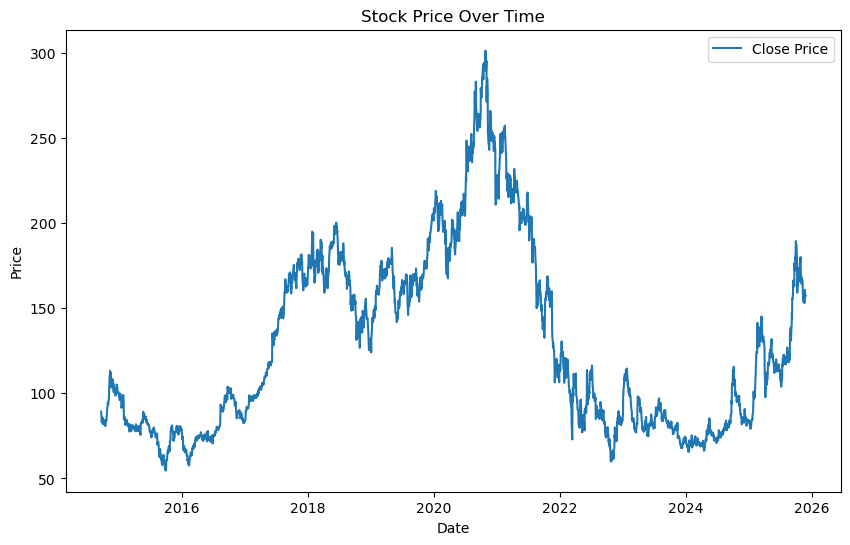

In [ ]:
#%%

# 绘制股票价格折线图

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

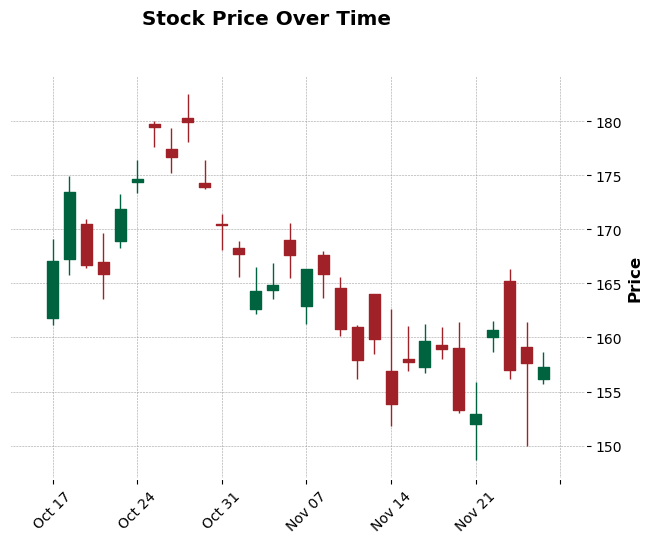

In [ ]:
#%%

# 绘制蜡烛图
mpf.plot(df[-30:], type='candle', style='charles', title='Stock Price Over Time', ylabel='Price')
plt.show()
# plt.savefig('./data/candlestick_chart.png')

In [ ]:
#%%

### 0.2 完成这个例子需要我们掌握哪些知识和能力?
#############################################

# 我们需要掌握以下知识和能力：
# 1. 数据读取和处理：能够使用Pandas库读取和处理CSV文件。
# 2. 时间序列分析：能够理解和分析时间序列数据（金融数据的特点）。
# 3. 数据可视化：能够使用Matplotlib库和mplfinance绘制股票价格的折线图和蜡烛图。

In [ ]:
#%%

### 0.3 进一步我们还可用做哪些事情？又需要哪些知识和能力？
#######################################################

# 知识体系：括号内为需要掌握的Python包
# A: 必备基础：Python基础，数据分析基础（numpy, Pandas), 可视化 (Matplotlib, mplfinance）
# B: 金融数据: 获取（pandas_datareader, yfinance, tushare, jqdatasdk）及时间序列分析
# C: 金融统计: 正态分布检验, 蒙特卡洛模拟, 投资组合优化, 期权估值, 风险测度   （scipy）
# D: 机器学习: 回归, 分类, 因子分析  （scikit-learn, statsmodels, factor_analyzer）

### 金融数据分析思维导图：fin-data-mind.png